In [1]:
%store -r import_all_libs

In [2]:
import_all_libs

In [3]:
from sklearn.manifold import TSNE

In [4]:
data = pd.read_csv('merged-fc-meal-order.csv')
fc = pd.read_csv('/home/tuts/datasets/food_forecasting/fulfilment_center_info.csv')

In [5]:
data.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,1379560,1,55,1885,136.83,152.29,0,0,177,Beverages,Thai,647,56,TYPE_C,2.00
1,1018704,2,55,1885,135.83,152.29,0,0,323,Beverages,Thai,647,56,TYPE_C,2.00
2,1196273,3,55,1885,132.92,133.92,0,0,96,Beverages,Thai,647,56,TYPE_C,2.00
3,1116527,4,55,1885,135.86,134.86,0,0,163,Beverages,Thai,647,56,TYPE_C,2.00
4,1343872,5,55,1885,146.50,147.50,0,0,215,Beverages,Thai,647,56,TYPE_C,2.00


## TSNE on FC to check how similar they are

In [6]:
fc

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.70
1,13,590,56,TYPE_B,6.70
2,124,590,56,TYPE_C,4.00
3,66,648,34,TYPE_A,4.10
4,94,632,34,TYPE_C,3.60
...,...,...,...,...,...
72,53,590,56,TYPE_A,3.80
73,30,604,56,TYPE_A,3.50
74,76,614,85,TYPE_A,3.00
75,68,676,34,TYPE_B,4.10


In [7]:
fc.describe(include='all')

,center_id,city_code,region_code,center_type,op_area
count,77.00,77.00,77.00,77,77.00
unique,nan,nan,nan,3,nan
top,nan,nan,nan,TYPE_A,nan
freq,nan,nan,nan,43,nan
mean,83.14,600.66,56.49,NaN,3.99
std,46.09,66.72,18.13,NaN,1.11
min,10.00,456.00,23.00,NaN,0.90
25%,50.00,553.00,34.00,NaN,3.50
50%,77.00,596.00,56.00,NaN,3.90
75%,110.00,651.00,77.00,NaN,4.40


In [8]:
fc["center_type"] = fc["center_type"].astype('category')
fc["center_type"] = fc["center_type"].cat.codes
fc

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,0,3.70
1,13,590,56,1,6.70
2,124,590,56,2,4.00
3,66,648,34,0,4.10
4,94,632,34,2,3.60
...,...,...,...,...,...
72,53,590,56,0,3.80
73,30,604,56,0,3.50
74,76,614,85,0,3.00
75,68,676,34,1,4.10


In [9]:
fc_embedded = TSNE(n_components=2).fit_transform((fc-fc.mean())/fc.std())

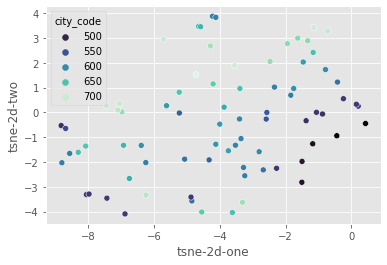

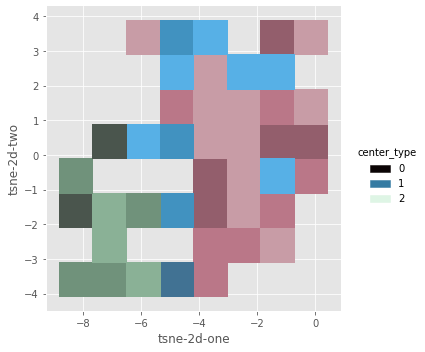

In [10]:
fc['tsne-2d-one'] = fc_embedded[:,0]
fc['tsne-2d-two'] = fc_embedded[:,1]

sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="city_code",
    palette=sns.color_palette("mako", as_cmap=True),
    data=fc,
);

sns.displot(fc, 
    x="tsne-2d-one", y="tsne-2d-two", 
    hue="center_type",
    palette=sns.color_palette("mako", as_cmap=True),
);

## center-meal analysis

- Given that we want to predict the number of orders for a FC-Meal pair, considering the total amount of solds for a meal can be misleading. A meal-id $m$ could have been sold millions from FC $f$ but not from FC $f_1$

In [11]:
gb = data.groupby(['center_id', 'meal_id', 'week', 'num_orders']).mean()
gb

id  checkout_price  base_price  \
center_id meal_id week num_orders                                        
10        1062    1    865         1436842          181.39      181.39   
                  2    782         1205013          183.36      182.36   
                  3    851         1447751          184.36      182.36   
                  4    1202        1014968          182.36      183.36   
                  5    958         1003563          183.39      181.39   
...                                    ...             ...         ...   
186       2956    112  82          1255251          583.03      581.03   
                  113  40          1436164          583.03      582.03   
                  114  27          1000576          583.03      581.03   
                  115  15          1429037          581.03      583.03   
                  116  122         1285049          292.03      582.03   

                                   emailer_for_promotion  homepage_featured  \
center_id meal_id week num_orders                                             
10        1062    1    865                             0                  0   
                  2    782                             0                  0   
                  3    851                             0                  0   
                  4    1202                            0                  0   
                  5    958                             0                  0   
...                                                  ...                ...   
186       2956    112  82                              0                  0   
                  113  40                              0                  0   
                  114  27                              0                  0   
                  115  15                              0                  0   
                  116  122                             0                  0   

                                   city_code  region_code  op_area  
center_id meal_id week num_orders                                   
10        1062    1    865               590           56     6.30  
                  2    782               590           56     6.30  
                  3    851               590           56     6.30  
                  4    1202              590           56     6.30  
                  5    958               590           56     6.30  
...                                      ...          ...      ...  
186       2956    112  82                649           34     3.40  
                  113  40                649           34     3.40  
                  114  27                649           34     3.40  
                  115  15                649           34     3.40  
                  116  122               649           34     3.40  

[456548 rows x 8 columns]

In [44]:
data.groupby(['center_id', 'meal_id', 'week',]).sum().describe()

,id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,op_area
count,456548.00,456548.00,456548.00,456548.00,456548.00,456548.00,456548.00,456548.00,456548.00
mean,1250096.31,332.24,354.16,0.08,0.11,261.87,601.55,56.61,4.08
std,144354.82,152.94,160.72,0.27,0.31,395.92,66.20,17.64,1.09
min,1000000.00,2.97,55.35,0.00,0.00,13.00,456.00,23.00,0.90
25%,1124998.75,228.95,243.50,0.00,0.00,54.00,553.00,34.00,3.60
50%,1250183.50,296.82,310.46,0.00,0.00,136.00,596.00,56.00,4.00
75%,1375140.25,445.23,458.87,0.00,0.00,324.00,651.00,77.00,4.50
max,1499999.00,866.27,866.27,1.00,1.00,24299.00,713.00,93.00,7.00


In [22]:
gb2 = data.groupby(['center_id', 'meal_id',]).sum()
gb2

id   week  checkout_price  base_price  \
center_id meal_id                                                 
10        1062     180098005  10585        25351.51    26300.44   
          1109     181225352  10585        39415.21    43305.78   
          1198     181042627  10585        25003.61    28036.17   
          1207     180181882  10523        55038.82    61346.54   
          1216     174481241  10558        56151.19    59098.21   
...                      ...    ...             ...         ...   
186       2707     184741639  10585        29002.56    30018.45   
          2760     176324041  10252        31915.44    33704.51   
          2826     179764763  10494        40885.06    42395.20   
          2867     124233154   7249        60643.64    66853.67   
          2956      56906019   3989        26424.60    26895.60   

                   emailer_for_promotion  homepage_featured  num_orders  \
center_id meal_id                                                         
10        1062                         4                  8      137742   
          1109                        14                 16      221685   
          1198                         0                 12       50393   
          1207                        12                 23       31031   
          1216                         7                 10       20940   
...                                  ...                ...         ...   
186       2707                         8                  3       30004   
          2760                         0                 18        8513   
          2826                        18                  9       38809   
          2867                        20                 12        3734   
          2956                         0                  0        1458   

                   city_code  region_code  op_area  
center_id meal_id                                   
10        1062         85550         8120   913.50  
          1109         85550         8120   913.50  
          1198         85550         8120   913.50  
          1207         84960         8064   907.20  
          1216         84370         8008   900.90  
...                      ...          ...      ...  
186       2707         94105         4930   493.00  
          2760         91509         4794   479.40  
          2826         92807         4862   486.20  
          2867         64251         3366   336.60  
          2956         29205         1530   153.00  

[3597 rows x 10 columns]

In [43]:
gb2.describe()

,id,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,op_area
count,3597.00,3597.00,3597.00,3597.00,3597.00,3597.00,3597.00,3597.00,3597.00,3597.00
mean,158668047.86,9490.00,42169.31,44951.21,10.30,13.86,33238.11,76351.96,7185.78,518.31
std,36032757.10,1969.64,19508.58,21274.60,10.43,15.85,39722.74,19357.02,2810.95,194.75
min,1067161.00,6.00,390.94,394.00,0.00,0.00,14.00,620.00,77.00,2.80
25%,152500520.00,9438.00,28247.79,29976.38,2.00,2.00,7059.00,69240.00,4930.00,405.60
50%,175361754.00,10380.00,39782.14,41427.60,8.00,10.00,19275.00,80620.00,7728.00,536.50
75%,180562751.00,10585.00,53130.04,56949.42,14.00,19.00,44517.00,89030.00,8701.00,609.00
max,186204496.00,10585.00,90924.39,98482.51,42.00,143.00,334334.00,103385.00,13485.00,1015.00


In [12]:
tmp = gb.reset_index() # .reset_index()
tmp['center_meal_id'] = tmp.center_id.astype(str) + tmp.meal_id.astype(str)
tmp
# plt.plot(tmp.week, tmp.num_orders);

,center_id,meal_id,week,num_orders,id,checkout_price,base_price,emailer_for_promotion,homepage_featured,city_code,region_code,op_area,center_meal_id
0,10,1062,1,865,1436842,181.39,181.39,0,0,590,56,6.30,101062
1,10,1062,2,782,1205013,183.36,182.36,0,0,590,56,6.30,101062
2,10,1062,3,851,1447751,184.36,182.36,0,0,590,56,6.30,101062
3,10,1062,4,1202,1014968,182.36,183.36,0,0,590,56,6.30,101062
4,10,1062,5,958,1003563,183.39,181.39,0,0,590,56,6.30,101062
...,...,...,...,...,...,...,...,...,...,...,...,...,...
456543,186,2956,112,82,1255251,583.03,581.03,0,0,649,34,3.40,1862956
456544,186,2956,113,40,1436164,583.03,582.03,0,0,649,34,3.40,1862956
456545,186,2956,114,27,1000576,583.03,581.03,0,0,649,34,3.40,1862956
456546,186,2956,115,15,1429037,581.03,583.03,0,0,649,34,3.40,1862956


In [23]:
tmp2 = gb2.reset_index() # .reset_index()
tmp2['center_meal_id'] = tmp2.center_id.astype(str) + tmp2.meal_id.astype(str)
tmp2

,center_id,meal_id,id,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,op_area,center_meal_id
0,10,1062,180098005,10585,25351.51,26300.44,4,8,137742,85550,8120,913.50,101062
1,10,1109,181225352,10585,39415.21,43305.78,14,16,221685,85550,8120,913.50,101109
2,10,1198,181042627,10585,25003.61,28036.17,0,12,50393,85550,8120,913.50,101198
3,10,1207,180181882,10523,55038.82,61346.54,12,23,31031,84960,8064,907.20,101207
4,10,1216,174481241,10558,56151.19,59098.21,7,10,20940,84370,8008,900.90,101216
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3592,186,2707,184741639,10585,29002.56,30018.45,8,3,30004,94105,4930,493.00,1862707
3593,186,2760,176324041,10252,31915.44,33704.51,0,18,8513,91509,4794,479.40,1862760
3594,186,2826,179764763,10494,40885.06,42395.20,18,9,38809,92807,4862,486.20,1862826
3595,186,2867,124233154,7249,60643.64,66853.67,20,12,3734,64251,3366,336.60,1862867


In [26]:
tmp2.nlargest(10, 'num_orders')

,center_id,meal_id,id,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,op_area,center_meal_id
123,13,1885,180048126,10585,20939.46,21271.51,2,80,334334,85550,8120,971.50,131885
131,13,2290,181097446,10585,40363.87,42305.11,13,9,319676,85550,8120,971.50,132290
3480,174,1885,181576990,10585,20988.54,21182.33,2,127,310876,101500,8120,1015.00,1741885
893,43,2290,183216628,10585,40611.18,42809.60,13,11,308764,85550,8120,739.50,432290
147,13,2707,182808238,10585,30399.15,32285.01,9,10,298925,85550,8120,971.50,132707
3345,157,1885,180419742,10585,14916.43,15135.20,8,85,291589,88305,13485,594.50,1571885
127,13,1993,181045272,10585,20960.17,21284.58,2,81,287407,85550,8120,971.50,131993
885,43,1885,181603465,10585,20837.28,21096.24,2,29,287281,85550,8120,739.50,431885
30,10,2290,179640669,10585,40688.12,42492.17,13,7,276984,85550,8120,913.50,102290
1496,67,1885,181916097,10585,20693.30,21241.65,2,29,270542,92510,8120,1015.00,671885


In [28]:
top_ids = tmp2.nlargest(10, 'num_orders').center_meal_id

In [27]:
tmp2.nsmallest(10, 'num_orders')

,center_id,meal_id,id,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,op_area,center_meal_id
2407,101,1571,1067161,85,581.03,583.03,0,0,14,699,85,2.80,1011571
3047,139,2577,4159999,274,757.69,756.69,0,0,41,2079,102,8.40,1392577
3113,145,1571,1488069,134,602.43,601.43,0,0,42,620,77,3.90,1451571
2200,92,2577,3457042,403,883.79,883.79,0,0,43,1578,102,8.70,922577
2157,91,2494,4805823,429,827.50,829.50,0,0,58,2360,224,3.60,912494
3124,145,2104,1408899,131,437.53,435.53,0,0,68,620,77,3.90,1452104
789,41,1770,7477684,764,2797.63,2874.38,0,0,82,3540,336,11.40,411770
1197,57,2760,7085057,670,1457.18,1457.18,0,0,84,3246,462,16.80,572760
772,39,2956,5472145,306,2428.12,2421.12,0,0,111,2104,136,15.20,392956
3035,139,2104,7339479,614,3541.68,3544.68,0,0,121,4158,204,16.80,1392104


In [41]:
bottom_ids = tmp2.nsmallest(30, 'num_orders').center_meal_id

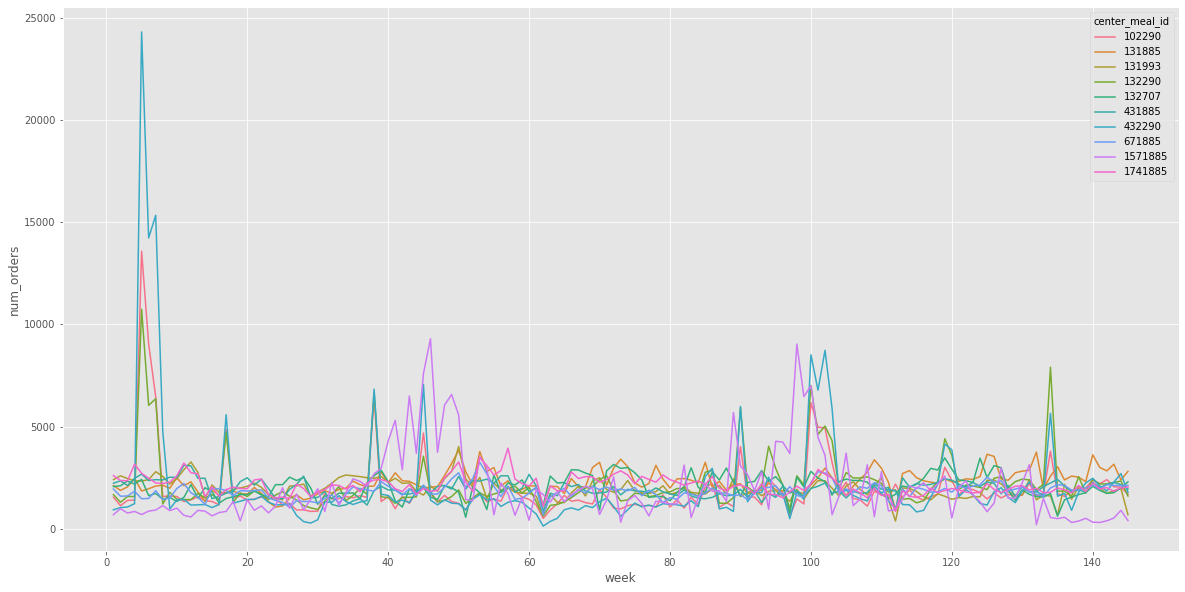

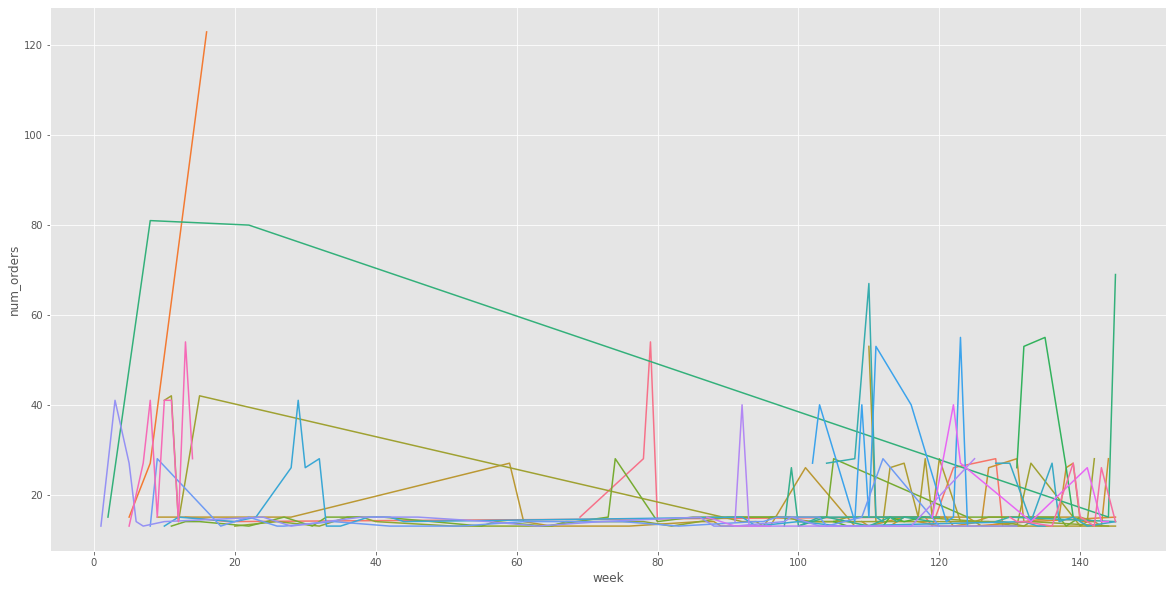

In [42]:
plt.figure(figsize=(20,10))
sns.lineplot(x="week", y="num_orders",
             hue="center_meal_id",
             data=tmp[tmp.center_meal_id.isin(top_ids)])

plt.figure(figsize=(20,10))
sns.lineplot(x="week", y="num_orders",
             hue="center_meal_id", legend=False,
             data=tmp[tmp.center_meal_id.isin(bottom_ids)]);

In [ ]:
gb.loc[10].unstack(level=0)